<a href="https://colab.research.google.com/github/Omar-Atwa16/Netflix-IMDB/blob/main/Python%20codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Seperating the decades
import pandas as pd

df = pd.read_csv("/content/Data/imdb_V2.csv", engine='python', on_bad_lines='skip')

df = df[['id', 'title', 'release_year', 'imdb_score', 'imdb_votes']]

# print(df)

era = {
    "50s": (1950, 1959),
    "60s": (1960, 1969),
    "70s": (1970, 1979),
    "80s": (1980, 1989),
    "90s": (1990, 1999),
    "00s": (2000, 2009),
    "10s": (2010, 2019),
    "20s": (2020, 2029)
}

pathh = "/content/Data"

for label, (start, end) in era.items():
    eraDF = df[(df['release_year'] >= start) & (df['release_year'] <= end)]
    filename = pathh + f"Netflix_{label}.csv"
    eraDF.to_csv(filename, index = False)
    print(f"Saved: Netflix_{label}.csv")

In [ ]:
# Adding era column
import pandas as pd

df = pd.read_csv("/content/Data/imdb_V2.csv", engine='python', on_bad_lines='skip')

def get_decade(year):
    decade = int(year) // 10 * 10
    return f"{decade}s"

df['era'] = df['release_year'].apply(get_decade)

df.to_csv("/content/Data/imdb_V3.csv", index=False)

ParserError: Error tokenizing data. C error: EOF inside string starting at row 3221

/tmp/ipython-input-11-4041322437.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='era', y='imdb_score', data=era_avg, palette='Blues_d')


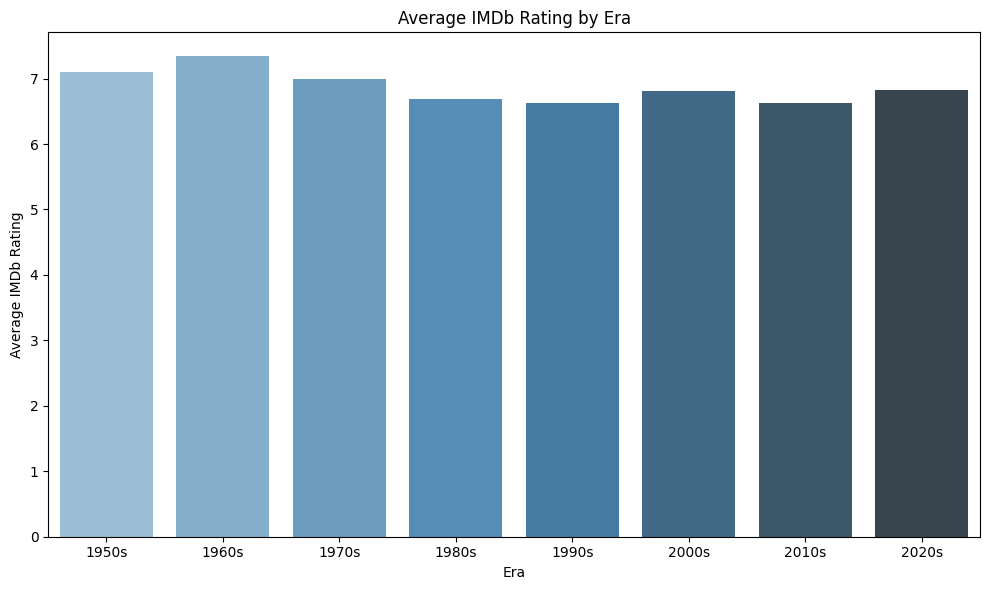

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Data/imdb_V2.csv", engine='python', on_bad_lines='skip')

def get_decade(year):
    decade = int(year) // 10 * 10
    return f"{decade}s"

df['era'] = df['release_year'].apply(get_decade)

era_avg = df.groupby('era')['imdb_score'].mean().round(2).reset_index()

# Average rating per era
plt.figure(figsize=(10,6))
sns.barplot(x='era', y='imdb_score', data=era_avg, palette='Blues_d')
plt.title('Average IMDb Rating by Era')
plt.xlabel('Era')
plt.ylabel('Average IMDb Rating')
plt.tight_layout()
plt.show()


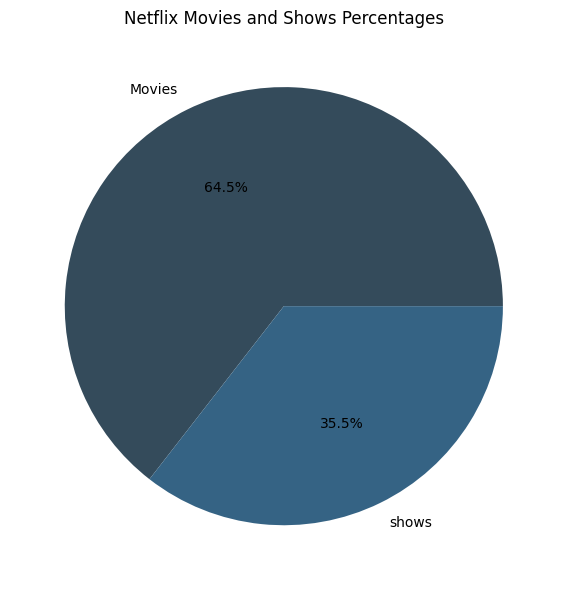

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Data/imdb_V2.csv", engine='python', on_bad_lines='skip')

# Pie chart for number of movies and shows
plt.figure(figsize=(10,6))
labels = ['Movies', 'shows']
sizes = [3407, 1876]
colors = ['#344b5b', '#356384']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Netflix Movies and Shows Percentages')
plt.tight_layout()
plt.show()

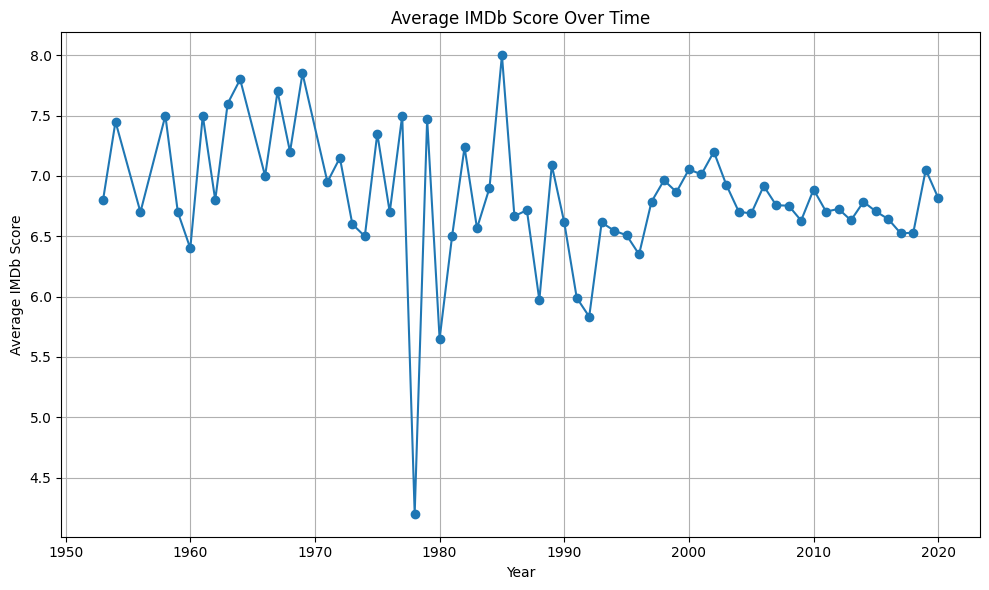

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Data/imdb_V2.csv", engine='python', on_bad_lines='skip')

yearly_avg = df.groupby('release_year')['imdb_score'].mean().reset_index()

# Bar chart for the average score per year
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['release_year'], yearly_avg['imdb_score'], marker='o')
plt.title('Average IMDb Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average IMDb Score')
plt.grid(True)
plt.tight_layout()
plt.show()

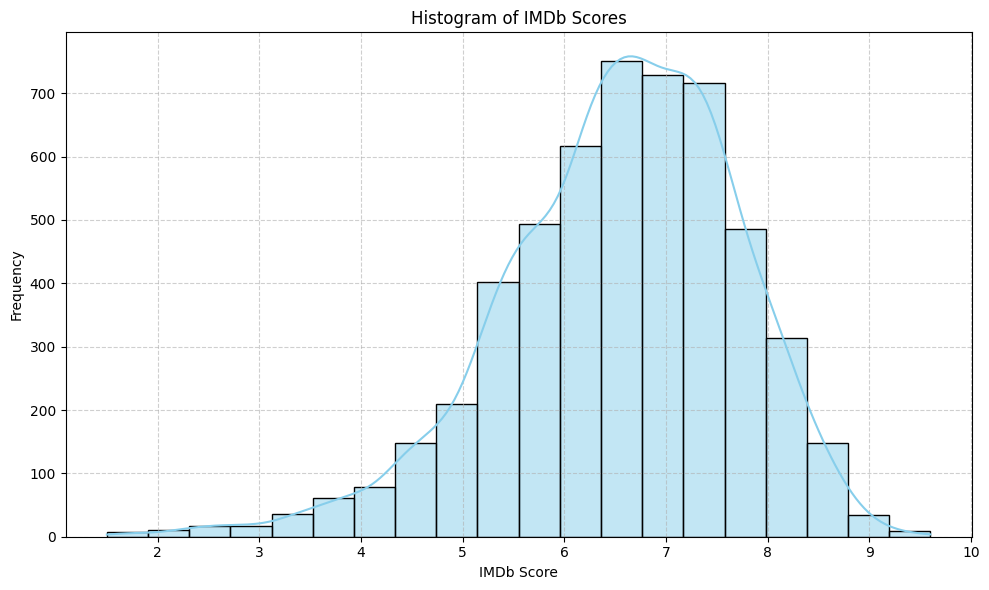

Skewness: -0.6598963299729065


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Data/imdb_V3.csv", engine='python', on_bad_lines='skip')

plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("Skewness:", df['imdb_score'].skew())